# Sales Analysis

## Data Preparation

### Import Libraries

In [2]:
import pandas as pd 
import os
import matplotlib.pyplot as plt

### Merger the 12 months data sales into a single CSV file

In [3]:
files = [file for file in os.listdir('./Sales_Data/')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data,df])

all_months_data = all_months_data.dropna()
all_months_data.to_csv("all_data.csv", index = False)

### Read the new data

In [4]:
data = pd.read_csv("all_data.csv")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## Data Cleaning

### Deleting Unnecessary Rows

In [5]:
data = data[data['Order Date'].str[0:2] != 'Or']

## Problem Statement

### Question 1 : What was the best month for sales ? How much was earned that month ?

The best month for sales will be seen from the highest earned for that month. To do this, I will create a new column named `month` and `sales`. Then, I will group by month to sum the sales column. Finally I will sort by `ascending = True` to see the best month for sales.

#### Month Column

In [6]:
data['Month'] = data['Order Date'].str[0:2]
data['Month'] = data['Month'].astype('int32')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Sales Colum

In [7]:
# Change Data Types to numeric
data['Price Each'] = data['Price Each'].astype('float')
data['Quantity Ordered'] = data['Quantity Ordered'].astype('int32')
# New Sales column, price each times quantity ordered
data['Sales'] = data['Quantity Ordered'] * data['Price Each']
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Group by Month and Summarize

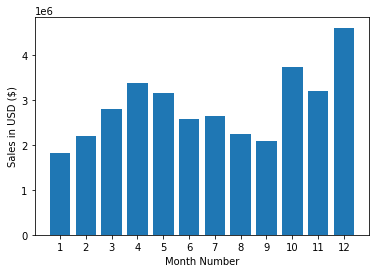

In [8]:
result = data.groupby('Month').sum()

months = range(1,13)
plt.bar(months, result['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.show()

### Question 2 : What city sold the most product ?

To answer this question, I will extract city from the `Purchase Address` column, then group by its location and sum the `Quantity Ordered`.

#### Create new `City` column

In [9]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

data['City'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Group by and visualize with bar plot

In [10]:
result_2 = data.groupby('City').sum()
result_2 = result_2.sort_values(['Quantity Ordered'],ascending = False)
result_2.head()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06


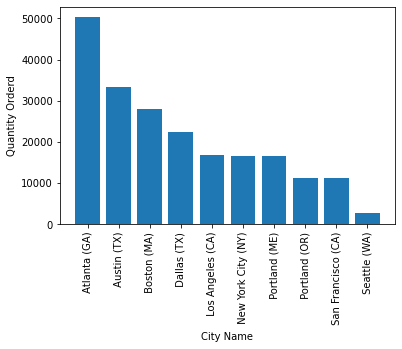

In [11]:
cities = [city for city, df in data.groupby('City')]

plt.bar(cities, result_2['Quantity Ordered'])
plt.xticks(cities,rotation = 'vertical')
plt.ylabel('Quantity Orderd')
plt.xlabel('City Name')
plt.show()

### Question 3 : What time should we display advertisements to maximize the likelihood of purchases ?

To see at what time should the company display the advertisements is by creating a new time interval and see how many people are buying at that interval of purchase time

#### Convert Order Date to datetime

In [12]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

#### New Colum `Hour` and `Minute`

In [13]:
data['Hour'] = data['Order Date'].dt.hour
data['Minute'] = data['Order Date'].dt.minute


#### Plotting

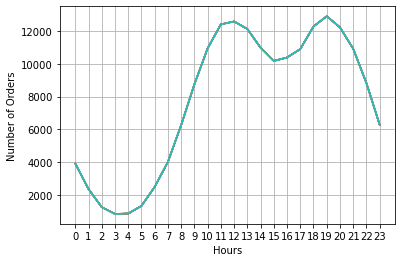

In [14]:
hours = [hour for hour, df in data.groupby('Hour')]

plt.plot(hours, data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

### What Products are most often sold together ?

To see what products are most often sold togetger is by `.groupby('Product')` and then using `.count()` function.

#### Check duplicate rows & join duplicate rows

In [42]:
df = data[data['Order ID'].duplicated(keep = False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

df = df[['Order ID','Grouped']].drop_duplicates()

<ipython-input-42-4744daf0c97e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


In [45]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 4)))

count.most_common(10)

[(('iPhone',
   'Lightning Charging Cable',
   'Apple Airpods Headphones',
   'Wired Headphones'),
  4),
 (('Google Phone',
   'USB-C Charging Cable',
   'Bose SoundSport Headphones',
   'Wired Headphones'),
  3),
 (('Vareebadd Phone',
   'USB-C Charging Cable',
   'Bose SoundSport Headphones',
   'Wired Headphones'),
  2),
 (('Google Phone',
   'USB-C Charging Cable',
   'Wired Headphones',
   'USB-C Charging Cable'),
  1),
 (('iPhone',
   'Lightning Charging Cable',
   'Wired Headphones',
   'AA Batteries (4-pack)'),
  1),
 (('Google Phone',
   'USB-C Charging Cable',
   'Bose SoundSport Headphones',
   '34in Ultrawide Monitor'),
  1),
 (('Google Phone',
   'USB-C Charging Cable',
   'Wired Headphones',
   'Apple Airpods Headphones'),
  1),
 (('iPhone',
   'Lightning Charging Cable',
   'Apple Airpods Headphones',
   'Google Phone'),
  1),
 (('iPhone', 'Lightning Charging Cable', 'Wired Headphones', 'Google Phone'),
  1),
 (('iPhone', 'Apple Airpods Headphones', 'Wired Headphones', '

### Question 5 : What product sold the most ? Why do you think it sold the most ?

#### Visualize

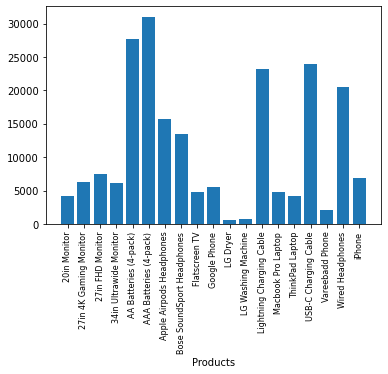

In [39]:
product_group = data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products,rotation = 'vertical',size = 8)
plt.xlabel('Products')
plt.show()

#### Double Y-Axis

<ipython-input-37-6907e33374dc>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


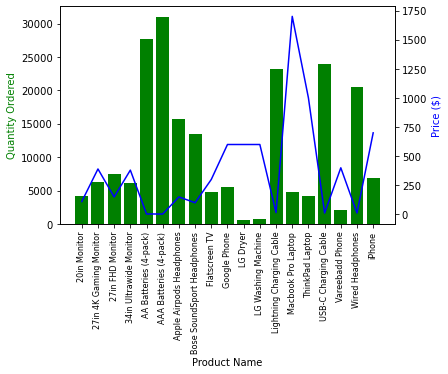

In [37]:
prices = data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()